1. ``Hu moment`` invariants are __invariant with respect to translation, scale, and
rotation__ 

2. __All the moments__ (except the seventh one) __are invariant to
reflection__. In the case of the seventh one, the sign has been changed by
reflection, which enables it to distinguish mirror images.

In [27]:
import cv2
from matplotlib import pyplot as plt

In [28]:

def centroid(moments):
    """Returns centroid based on moments"""

    x_centroid = round(moments['m10'] / moments['m00'])
    y_centroid = round(moments['m01'] / moments['m00'])
    return x_centroid, y_centroid


def draw_contour_outline(img, cnts, color, thickness=1):
    """Draws contours outlines of each contour"""

    for cnt in cnts:
        cv2.drawContours(img, [cnt], 0, color, thickness)

In [29]:
def img_plt(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(1, 1, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(12, 5))
plt.suptitle("Hu moments", fontsize=14, fontweight='bold')
plt.rcParams['figure.facecolor'] = 'silver'

<Figure size 864x360 with 0 Axes>

In [30]:
#Loading the image
image = cv2.imread("images/shape_features.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [31]:
#Thresholding
ret, thresh = cv2.threshold(gray_image, 70, 255, cv2.THRESH_BINARY)

In [32]:
#calculating Moments
M = cv2.moments(thresh, True)
print("Moments: '{}' ".format(M))

Moments: '{'m00': 203750.0, 'm10': 124935453.0, 'm01': 55115564.0, 'm20': 82543492477.0, 'm11': 33008079479.0, 'm02': 16977512254.0, 'm30': 57928322545653.0, 'm21': 21360792880195.0, 'm12': 9949984821083.0, 'm03': 5739523802738.0, 'mu20': 5935554237.416153, 'mu11': -787689628.6833992, 'mu02': 2068430560.561491, 'mu30': 35164559241.21875, 'mu21': -1712254694.2646484, 'mu12': -34139193556.8479, 'mu03': 27962590092.666016, 'nu20': 0.14297695479492406, 'nu11': -0.01897404352280385, 'nu02': 0.04982481684517122, 'nu30': 0.001876554295887196, 'nu21': -9.137435450659671e-05, 'nu12': -0.0018218357263563713, 'nu03': 0.0014922217054555782}' 


In [33]:
#calculating the CENTROID of the Contour Based on Moments
x, y = centroid(M)
print(x, y)

613 271


In [34]:
#calculating Hu Moment
HuM = cv2.HuMoments(M)
print("Hu Moment: '{}' ".format(HuM))

Hu Moment: '[[ 1.92801772e-01]
 [ 1.01173781e-02]
 [ 5.70258405e-05]
 [ 1.96536742e-06]
 [ 2.46949980e-12]
 [-1.88337981e-07]
 [ 2.06595472e-11]]' 


Finding Contours in the THRESHOLDED Image

In [35]:
contours, heirarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#computing Moments
M2= cv2.moments(contours[0])
print("Moment in Thresholded Image: '{}'".format(M2))

Moment in Thresholded Image: '{'m00': 202785.0, 'm10': 124372379.0, 'm01': 54829844.0, 'm20': 82168467695.5, 'm11': 32850490115.583332, 'm02': 16869833345.166666, 'm30': 57652475508413.1, 'm21': 21260883323130.867, 'm12': 9892816761440.7, 'm03': 5694476209814.601, 'mu20': 5888226759.929611, 'mu11': -777826271.1261177, 'mu02': 2044714164.4366512, 'mu30': 34045414856.882812, 'mu21': -2050611262.6801758, 'mu12': -33189206762.140137, 'mu03': 27424662891.551758, 'nu20': 0.14319006045636395, 'nu11': -0.01891520067553043, 'nu02': 0.04972341534366583, 'nu30': 0.0018385229812255984, 'nu21': -0.00011073725927106339, 'nu12': -0.0017922859691194718, 'nu03': 0.00148098864973265}'


In [36]:
#calculating centroid
x2, y2 = centroid(M2)
print(x2, y2)

613 270


In [37]:
#Computing Hu Moment
Hum2 = cv2.HuMoments(M2)
print("Hu Moments in Thresholded Image: '{}'".format(Hum2))

Hu Moments in Thresholded Image: '[[ 1.92913476e-01]
 [ 1.01671530e-02]
 [ 5.53494172e-05]
 [ 1.87972673e-06]
 [ 2.77053346e-12]
 [-1.80085705e-07]
 [ 1.89721511e-11]]'


Drawing Contours and Centroids

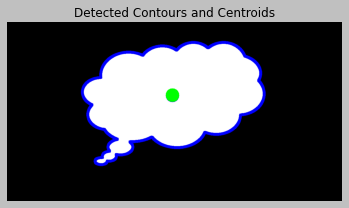

In [38]:
draw_contour_outline(image, contours, (255, 0, 0), 10)

#drawing centroids
cv2.circle(image, (x, y), 25, (255, 0, 0), -1)
cv2.circle(image, (x2, y2), 25, (0, 255, 0), -1)

img_plt(image, "Detected Contours and Centroids", 1)
plt.show()
